In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
from api_keys import api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [4]:
x=1
count=1
city_df=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]


#Base line information
url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={api_key}&q="
city_responses= [ ]

#Beginning Print
print("Beginning Data Retrieval")
print("------------------------")

#for loop to make a api request for each city. 
for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data=requests.get(url + city).json()
        city_df.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        city_responses.append(city_data)
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
#Final Print
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1|scarborough
Processing Record 2 of set 1|mataura
Processing Record 3 of set 1|nome
Processing Record 4 of set 1|hirado
Processing Record 5 of set 1|tasiilaq
City not found. Skipping... 
Processing Record 6 of set 1|victoria
Processing Record 7 of set 1|saldanha
Processing Record 8 of set 1|chokurdakh
City not found. Skipping... 
Processing Record 9 of set 1|tuktoyaktuk
Processing Record 10 of set 1|barrow
Processing Record 11 of set 1|vejprty
Processing Record 12 of set 1|poso
Processing Record 13 of set 1|roblin
Processing Record 14 of set 1|port-cartier
Processing Record 15 of set 1|bambous virieux
Processing Record 16 of set 1|ushuaia
Processing Record 17 of set 1|saint-philippe
Processing Record 18 of set 1|manchester
Processing Record 19 of set 1|srednekolymsk
Processing Record 20 of set 1|hobart
Processing Record 21 of set 1|tucumcari
Processing Record 22 of set 1|georgetown
Processing Record 23 of set

Processing Record 46 of set 4|talnakh
Processing Record 47 of set 4|vestmannaeyjar
Processing Record 48 of set 4|jimo
Processing Record 49 of set 4|santa rosa
City not found. Skipping... 
Processing Record 50 of set 4|coihaique
Processing Record 1 of set 5|dilijan
City not found. Skipping... 
Processing Record 2 of set 5|novikovo
Processing Record 3 of set 5|gornyy
Processing Record 4 of set 5|kaitangata
Processing Record 5 of set 5|jamestown
Processing Record 6 of set 5|najran
Processing Record 7 of set 5|aktau
Processing Record 8 of set 5|sisimiut
Processing Record 9 of set 5|berlevag
Processing Record 10 of set 5|macusani
Processing Record 11 of set 5|joshimath
Processing Record 12 of set 5|chapais
Processing Record 13 of set 5|spornoye
Processing Record 14 of set 5|teya
Processing Record 15 of set 5|zhezkazgan
Processing Record 16 of set 5|potiskum
Processing Record 17 of set 5|kargasok
Processing Record 18 of set 5|garavuti
City not found. Skipping... 
Processing Record 19 of set 

Processing Record 45 of set 8|taua
Processing Record 46 of set 8|grand-santi
Processing Record 47 of set 8|kyzyl-suu
Processing Record 48 of set 8|hamadan
Processing Record 49 of set 8|lebyazhye
Processing Record 50 of set 8|san patricio
Processing Record 1 of set 9|tual
Processing Record 2 of set 9|kalmunai
Processing Record 3 of set 9|padang
Processing Record 4 of set 9|ranong
Processing Record 5 of set 9|totma
Processing Record 6 of set 9|asyut
City not found. Skipping... 
Processing Record 7 of set 9|los banos
Processing Record 8 of set 9|havre-saint-pierre
Processing Record 9 of set 9|thompson
Processing Record 10 of set 9|chuguyevka
Processing Record 11 of set 9|isla vista
Processing Record 12 of set 9|saint-louis
Processing Record 13 of set 9|kappeln
Processing Record 14 of set 9|nirmali
Processing Record 15 of set 9|kulhudhuffushi
Processing Record 16 of set 9|junagadh
Processing Record 17 of set 9|shenandoah
Processing Record 18 of set 9|winneba
Processing Record 19 of set 9|s

In [5]:
main_df=pd.DataFrame({"City": city_df, "Lat": lat, "Lng": long, 
                      "Max Temp": Max_Temp, "Humidity": Humidity, 
                      "Cloudiness":Cloudiness, "Wind Speed": Wind_Speed,
                     "Country": Country, "Date": Date})
main_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Scarborough,54.28,-0.40,54.00,80,98,5.01,GB,1603123201
1,Mataura,-46.19,168.86,48.99,81,59,15.99,NZ,1603123426
2,Nome,64.50,-165.41,39.20,93,90,5.82,US,1603123426
3,Hirado,33.36,129.55,66.00,68,29,11.99,JP,1603123426
4,Tasiilaq,65.61,-37.64,32.00,97,40,8.05,GL,1603123426


In [6]:
main_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
main_df["Humidity"].max()

main_df=main_df[main_df["Humidity"]<= 100]

main_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,21.181484,16.450265,61.857756,70.051237,50.978799,8.232403,1.603123e+09
std,32.616056,90.529228,21.329631,21.671298,38.028302,6.091250,7.289216e+01
min,-54.800000,-175.200000,9.590000,6.000000,0.000000,0.110000,1.603123e+09
25%,-4.495000,-64.367500,45.325000,59.000000,13.250000,3.985000,1.603123e+09
50%,26.325000,21.800000,66.200000,74.500000,51.000000,6.930000,1.603123e+09
75%,47.767500,93.245000,79.022500,85.000000,90.000000,10.935000,1.603123e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,41.250000,1.603123e+09


In [8]:
#Export the City_Data into a csv
main_df.to_csv(output_data_file, index_label= "city_id")

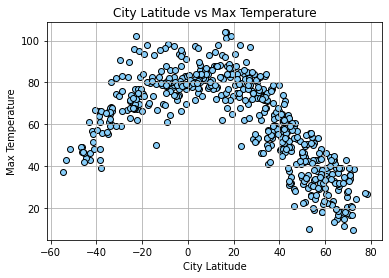

In [9]:
#New (x,y) Variables
latitude=main_df["Lat"]
Max_T=main_df["Max Temp"]

#Making Scatter Plot
plt.scatter(latitude, Max_T, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.savefig("output_data/Fig1.png")
plt.show()

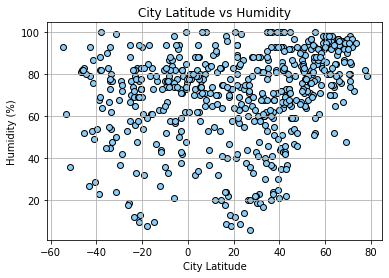

In [10]:
#New (y) variable
Humidity_data=main_df["Humidity"]

#Making Scatter Plot
plt.scatter(latitude, Humidity_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

#Saving the graph to a PNG
plt.savefig("output_data/Fig2.png")
plt.show()

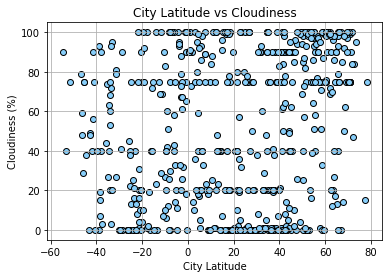

In [11]:
#New (y) variable
Cloud_data=main_df["Cloudiness"]

#Making Scatter Plot
plt.scatter(latitude, Cloud_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

#Saving the graph to a PNG
plt.savefig("output_data/Fig3.png")
plt.show()

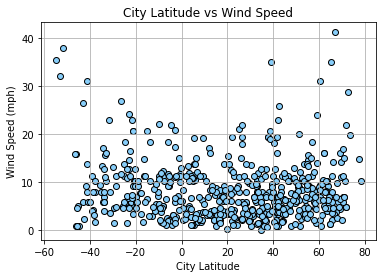

In [12]:
#New (y) variable
Wind_data=main_df["Wind Speed"]

#Making Scatter Plot
plt.scatter(latitude, Wind_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig4.png")
plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=main_df[main_df["Lat"]>0]
Southern_df=main_df[main_df["Lat"]<0]

In [14]:
def plot_linear_regression(x,y,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x,y)
    regress_values= x*slope + intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x, y, marker="o", facecolors="lightskyblue", edgecolors="black")
    plt.plot(x, regress_values, color='red')
    plt.annotate(line_eq, text_coordinates, color='red', fontsize= 14)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")

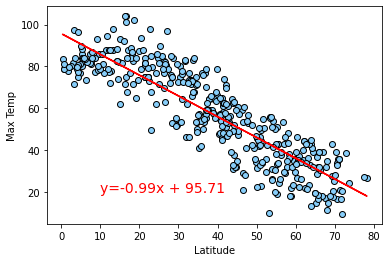

The r-squared is: 0.7730768504841357


In [15]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Max Temp"], "Max Temp",(10,20))

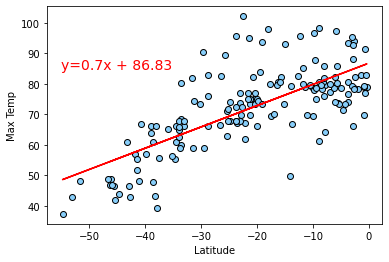

The r-squared is: 0.5176813005627079


In [16]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Max Temp"], "Max Temp",(-55,85))

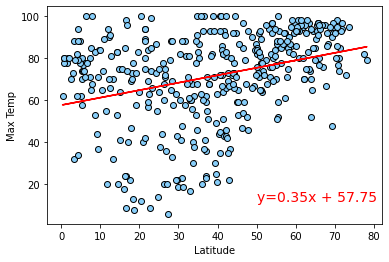

The r-squared is: 0.10451097066516492


In [17]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Humidity"], "Max Temp",(50,12))

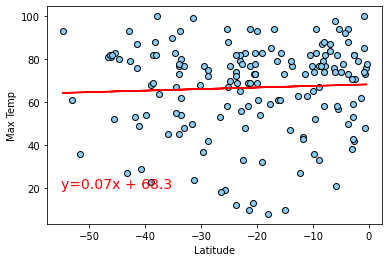

The r-squared is: 0.0023125626536921722


In [18]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Humidity"], "Max Temp",(-55,20))

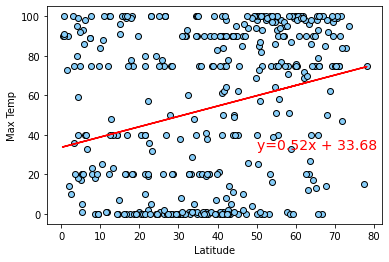

The r-squared is: 0.0707766775075409


In [19]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Cloudiness"], "Max Temp",(50,33))

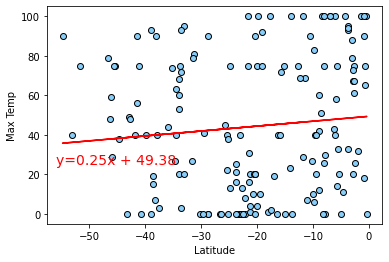

The r-squared is: 0.009986670954537804


In [20]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Cloudiness"], "Max Temp",(-56,25))

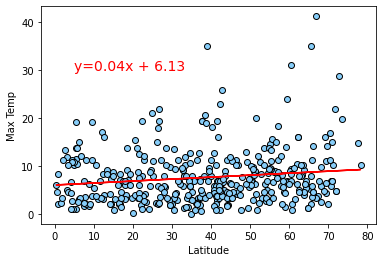

The r-squared is: 0.0207361379093473


In [21]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Wind Speed"], "Max Temp",(5,30))

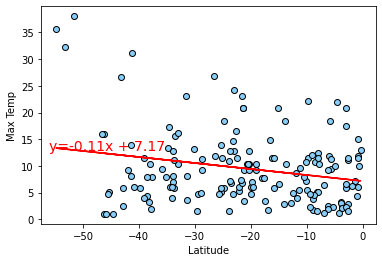

The r-squared is: 0.052107251902193084


In [22]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Wind Speed"], "Max Temp",(-56,13))